In [76]:
# Importing the necessary libraries

import numpy as np
from matplotlib import pyplot
import pandas as pd
from pandas import read_csv
from pandas.plotting import scatter_matrix
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [77]:
filename = 'train1.csv'
#names = ['Ref_no', 'Credit_Amount', 'Gender', 'Education', 'Marital_Status','AGE', 'Sep_status', 'August_Status',
#          'April_status','September_bill','August_bill','April_bill','Defaulter?']
#dataset = read_csv(filename,names = names,skiprows=1)
dataset = read_csv(filename)
dataset.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,Y
0,22203,320000,2,1,2,27,1,2,2,2,2,2,43243,42537,41370,40694,1
1,1288,470000,1,2,1,41,-2,-2,-2,-2,-2,-1,13780,12242,32463,20621,0
2,11822,20000,1,2,2,25,1,2,0,0,0,0,20415,18266,18921,19297,0
3,15085,80000,1,3,1,41,0,0,0,0,0,-1,76015,77582,60311,62471,1
4,6192,30000,1,1,2,30,1,-2,-2,-2,-2,-2,0,0,0,0,1


In [78]:
print(dataset.shape)
dataset.describe().T

(21600, 17)


,count,mean,std,min,25%,50%,75%,max
Ref.No,21600.0,12000.773750,6931.541584,1.0,6008.75,12001.5,17995.25,24000.0
X1,21600.0,165235.818519,129013.755215,10000.0,50000.00,140000.0,230000.00,1000000.0
X2,21600.0,1.626991,0.483616,1.0,1.00,2.0,2.00,2.0
X3,21600.0,1.845926,0.781139,0.0,1.00,2.0,2.00,6.0
X4,21600.0,1.558704,0.522008,0.0,1.00,2.0,2.00,3.0
X5,21600.0,35.382361,9.266769,21.0,28.00,34.0,41.00,79.0
X6,21600.0,-0.002917,1.126164,-2.0,-1.00,0.0,0.00,8.0
X7,21600.0,-0.124028,1.201892,-2.0,-1.00,0.0,0.00,8.0
X8,21600.0,-0.157176,1.203906,-2.0,-1.00,0.0,0.00,8.0
X9,21600.0,-0.214213,1.165579,-2.0,-1.00,0.0,0.00,8.0


In [79]:
print(dataset.isnull().sum(axis=0))
print(dataset.dtypes)

Ref.No    0
X1        0
X2        0
X3        0
X4        0
X5        0
X6        0
X7        0
X8        0
X9        0
X10       0
X11       0
X12       0
X13       0
X14       0
X15       0
Y         0
dtype: int64
Ref.No    int64
X1        int64
X2        int64
X3        int64
X4        int64
X5        int64
X6        int64
X7        int64
X8        int64
X9        int64
X10       int64
X11       int64
X12       int64
X13       int64
X14       int64
X15       int64
Y         int64
dtype: object


In [80]:
dataset = dataset.drop('Ref.No',axis=1)

In [81]:
print(dataset.corr(method='pearson'))

           X1        X2        X3        X4        X5        X6        X7  \
X1   1.000000  0.034904 -0.227472 -0.105628  0.149632 -0.266460 -0.294104   
X2   0.034904  1.000000  0.016744 -0.036408 -0.098736 -0.061844 -0.071631   
X3  -0.227472  0.016744  1.000000 -0.139503  0.166523  0.108855  0.126305   
X4  -0.105628 -0.036408 -0.139503  1.000000 -0.412459  0.013404  0.020276   
X5   0.149632 -0.098736  0.166523 -0.412459  1.000000 -0.037337 -0.053494   
X6  -0.266460 -0.061844  0.108855  0.013404 -0.037337  1.000000  0.669413   
X7  -0.294104 -0.071631  0.126305  0.020276 -0.053494  0.669413  1.000000   
X8  -0.286128 -0.071199  0.116478  0.028201 -0.056584  0.571103  0.767796   
X9  -0.263034 -0.059212  0.112588  0.027403 -0.050888  0.534592  0.663134   
X10 -0.245133 -0.058034  0.099792  0.032633 -0.054219  0.500460  0.617374   
X11 -0.232363 -0.045643  0.084184  0.032148 -0.045676  0.467200  0.570667   
X12  0.287298 -0.027344  0.023668 -0.026286  0.060516  0.179432  0.230106   

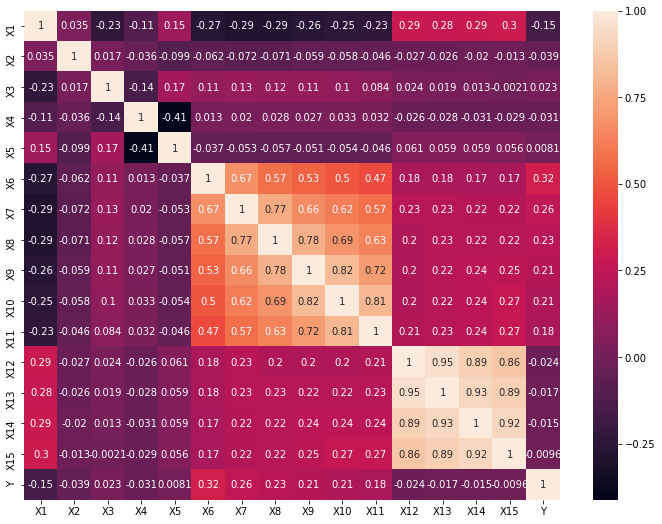

In [82]:
corr = dataset.corr()
import matplotlib.pyplot as plt
plt.figure(figsize=(12,9))
sn.heatmap(corr,annot=True, )

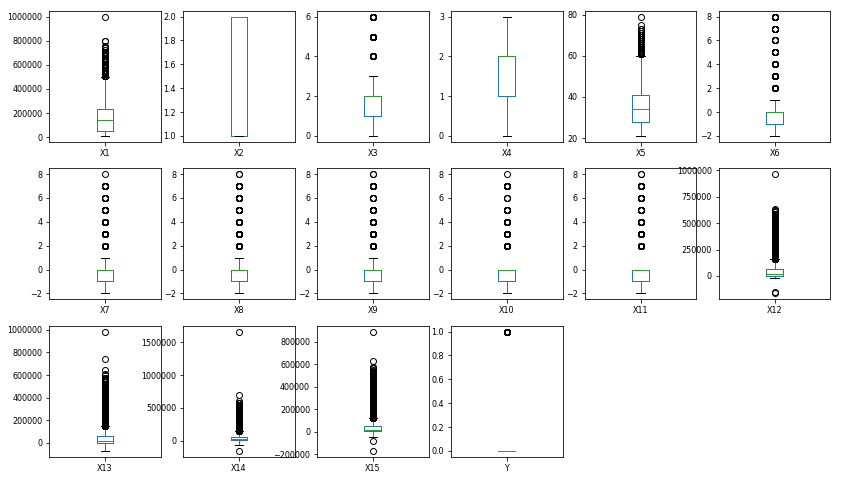

In [83]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(5,6), fontsize=8, figsize=(14,14))
pyplot.show()

In [84]:
X = dataset.drop('Y', axis=1)
Y = dataset[['Y']]

X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15
0,320000,2,1,2,27,1,2,2,2,2,2,43243,42537,41370,40694
1,470000,1,2,1,41,-2,-2,-2,-2,-2,-1,13780,12242,32463,20621
2,20000,1,2,2,25,1,2,0,0,0,0,20415,18266,18921,19297
3,80000,1,3,1,41,0,0,0,0,0,-1,76015,77582,60311,62471
4,30000,1,1,2,30,1,-2,-2,-2,-2,-2,0,0,0,0


In [109]:
Y.head()

,Y
0,1
1,0
2,0
3,1
4,1


In [85]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.0000463   0.03490539 -0.22748245 -0.10563325  0.14963852 -0.26647283
  -0.29411805 -0.28614172 -0.26304579 -0.24514436 -0.23237351  0.28731081
   0.28097173  0.28681789  0.2967601 ]
 [ 0.03490539  1.0000463   0.01674513 -0.03641015 -0.09874013 -0.0618468
  -0.07163432 -0.07120232 -0.05921446 -0.05803664 -0.04564474 -0.02734517
  -0.0263179  -0.01975033 -0.01316511]
 [-0.22748245  0.01674513  1.0000463  -0.13950938  0.16653121  0.10886009
   0.12631125  0.1164837   0.11259356  0.09979683  0.0841875   0.02366889
   0.01913514  0.0131864  -0.00211444]
 [-0.10563325 -0.03641015 -0.13950938  1.0000463  -0.41247828  0.01340488
   0.02027723  0.02820249  0.02740421  0.03263404  0.03214906 -0.0262868
  -0.02753124 -0.03113072 -0.02893304]
 [ 0.14963852 -0.09874013  0.16653121 -0.41247828  1.0000463  -0.03733858
  -0.05349654 -0.05658702 -0.05089014 -0.05422179 -0.045678    0.06051871
   0.05934839  0.05850689  0.0564017 ]
 [-0.26647283 -0.0618468   0.10886009  0.0134

In [86]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
#print('Eigen Vectors \n%s', eig_vecs)
#print('\n Eigen Values \n%s', eig_vals)

print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,5.150173,3.260515,1.499488,1.032058,0.96793,0.713415,0.576295,0.532553,0.406252,0.264781,0.040524,0.069659,0.194499,0.156785,0.135769


In [87]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
#print("Cumulative Variance Explained", cum_var_exp)
print("Eigen Values:")
pd.DataFrame(cum_var_exp).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,34.332895,56.068656,66.064777,72.944847,79.397415,84.153292,87.995083,91.54527,94.253489,96.018613,97.315212,98.360396,99.265482,99.729853,100.0


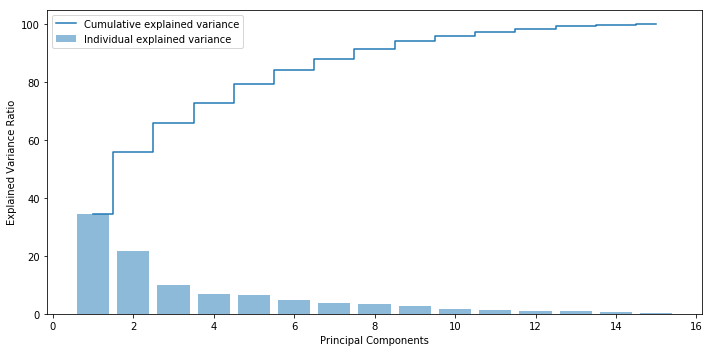

In [88]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 , random_state=1)
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [110]:
from sklearn.decomposition import PCA
X_train_reduced = PCA(n_components=7).fit_transform(X_train_std)
X_test_reduced = PCA(n_components=7).fit_transform(X_test_std)

In [97]:
NNH = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean') 
NNH.fit(X_train_reduced, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=21, p=2,
           weights='uniform')

In [99]:
predicted_labels = NNH.predict(X_test_reduced)
from sklearn import metrics
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, predicted_labels ), 2 ) )

Total Accuracy :  0.8


In [100]:
NNH.score(X_train_reduced,y_train)

0.8145502645502646

In [101]:
NNH.score(X_test_reduced,y_test)

0.7993827160493827

In [102]:
from sklearn.metrics import accuracy_score
param_grid = {'n_neighbors': list(range(21,0,-1))}
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
gs = GridSearchCV(knn,param_grid,cv=10)
gs.fit(X_train_reduced, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [103]:
gs.best_params_

{'n_neighbors': 17}

In [121]:
NNH = KNeighborsClassifier(n_neighbors= 17 , weights = 'uniform', metric='euclidean') 
NNH.fit(X_train_reduced, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [105]:
predicted_labels = NNH.predict(X_test_reduced)
from sklearn import metrics
print( 'Total Accuracy : ',np.round( metrics.accuracy_score( y_test, predicted_labels ), 2 ) )

Total Accuracy :  0.8


In [106]:
NNH.score(X_train_reduced,y_train)

0.8148148148148148

In [111]:
NNH.score(X_test_reduced,y_test)

0.8001543209876543

In [145]:
from sklearn.decomposition import PCA
X_train_reduced = PCA(n_components=10).fit_transform(X_train_std)
X_test_reduced = PCA(n_components=10).fit_transform(X_test_std)

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('RF', RandomForestClassifier()))

results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=10, random_state=7) 
    cv_results = cross_val_score(model, X_train_reduced, y_train, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.806746 (0.007847)
RF: 0.793651 (0.006574)


In [147]:
results = []
names = []
for name, model in ensembles: 
    kfold = KFold(n_splits=10, random_state=7) 
    cv_results = cross_val_score(model, X_test_reduced, y_test, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.803084 (0.010634)
RF: 0.789968 (0.005380)


In [149]:
model = AdaBoostClassifier()
model.fit(X_train_reduced, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [152]:
predict = model.predict(X_test_reduced)
model.score(X_test_reduced,predict)

1.0

In [153]:
filename = 'test_credit.csv'
dataset_test = read_csv(filename)
dataset_test.head()

,Ref.No,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,17083,50000,2,1,2,25,0,0,0,0,...,38008,31898,20154,2000,5040,8034,3029,5000,49436,NaN
1,3494,120000,2,2,2,24,0,0,0,0,...,6761,7189,1087,1400,1000,0,1000,1087,801,NaN
2,21945,120000,2,2,2,27,1,-2,-1,-1,...,0,0,0,0,2382,0,0,0,0,NaN
3,3499,60000,1,1,2,28,0,-1,0,0,...,9900,310,160,6000,10000,900,310,0,3400,NaN
4,18973,100000,2,1,2,28,3,2,0,0,...,53407,51951,53195,0,1831,4339,0,2083,1939,NaN


In [154]:
X = dataset_test[['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15']]
Y = dataset_test[['Y']]

In [155]:
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00041701e+00  2.16542734e-02 -2.47429001e-01 -9.49345580e-02
   1.12666970e-01 -2.65467599e-01 -3.08343855e-01 -2.80159314e-01
  -2.61039477e-01 -2.52780625e-01 -2.40065793e-01  2.75076674e-01
   2.73578925e-01  2.88737722e-01  2.94954017e-01]
 [ 2.16542734e-02  1.00041701e+00  6.85193056e-03 -2.99296012e-02
  -1.03145427e-01 -5.19412235e-02 -6.93916294e-02 -5.34860068e-02
  -6.68741785e-02 -5.63187300e-02 -3.06671636e-02 -5.40136707e-02
  -4.72925854e-02 -4.18602494e-02 -3.59471811e-02]
 [-2.47429001e-01  6.85193056e-03  1.00041701e+00 -1.58504899e-01
   1.81987694e-01  7.90222550e-02  1.29376974e-01  1.03912350e-01
   9.52126912e-02  8.45817893e-02  8.88312827e-02 -1.97856849e-02
  -3.00234702e-02 -3.32242429e-02 -3.54083862e-02]
 [-9.49345580e-02 -2.99296012e-02 -1.58504899e-01  1.00041701e+00
  -4.13163841e-01  3.41951610e-02  2.34674918e-02  1.88409828e-02
   1.85690871e-02  2.68757277e-02  2.04555589e-02 -5.82918087e-03
   1.53500767e-04 -5.69138199e-03

In [156]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
#print('Eigen Vectors \n%s', eig_vecs)
#print('\n Eigen Values \n%s', eig_vals)

print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,5.216015,3.203751,1.529382,1.019989,0.964288,0.686367,0.568052,0.533817,0.416279,0.040668,0.051362,0.26891,0.130803,0.168661,0.207913


In [157]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
#print("Cumulative Variance Explained", cum_var_exp)
print("Eigen Values:")
pd.DataFrame(cum_var_exp).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,34.758938,56.108375,66.300004,73.097093,79.522999,84.096872,87.882305,91.4396,94.213634,96.005622,97.39113,98.515068,99.386724,99.728995,100.0


In [160]:
X_std = sc.fit_transform(X)
X_reduced = PCA(n_components=10).fit_transform(X_std)

X_reduced.shape

(2399, 10)

In [127]:
Test = NNH.predict(X_reduced)

In [161]:
Test1 = model.predict(X_reduced)

In [162]:
predict = pd.DataFrame({'Test1':Test}, columns= ['Test'], index = None)

In [163]:
predict.to_csv('Test-New.csv', index=False)